# Computer Vision Course

> Date: Setember 22, 2020

Code made based in a computer vision course introduced by professor Glauco on the event "Semana Univeritária" in UnB/FGA.

## 1. Working with images and Histogram

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read image
img = cv2.imread('lenna.png')

# Convert RGB image to  gray scale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Get number of lines and columns
qntI, qntJ = img.shape

In [3]:
# Creating Histogram manually
histogram = np.zeros(256)

for i in range(qntI):
    for j in range(qntJ):
        color = img[i, j]
        histogram[color] += 1

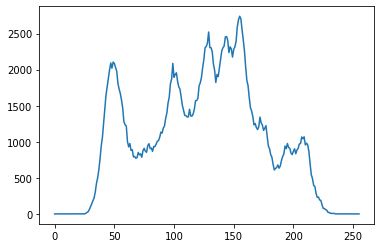

In [4]:
plt.plot(histogram)

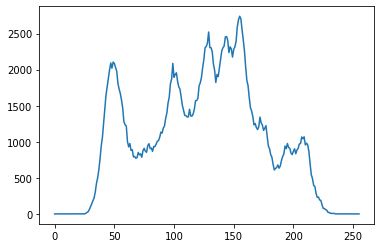

In [5]:
# Using a built-in function

histogram_cv = cv2.calcHist([img], [0], None, [256], [0, 255])

plt.plot(histogram_cv)
plt.show()

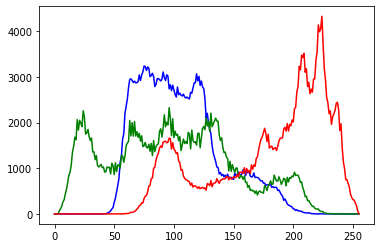

In [6]:
# Plotting a RGB version

img = cv2.imread('lenna.png')

# Blue channel
histogram_cv_b = cv2.calcHist([img], [0], None, [256], [0, 255])
# Green channel
histogram_cv_g = cv2.calcHist([img], [1], None, [256], [0, 255])
# Red channel
histogram_cv_r = cv2.calcHist([img], [2], None, [256], [0, 255])

plt.plot(histogram_cv_b, 'b')
plt.plot(histogram_cv_g, 'g')
plt.plot(histogram_cv_r, 'r')
plt.show()

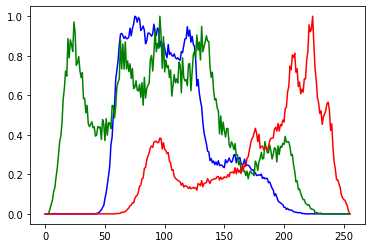

In [7]:
# Normalized version

# Read image
img = cv2.imread('lenna.png')

# Blue channel
histogram_cv_b = cv2.calcHist([img], [0], None, [256], [0, 255])
# Green channel
histogram_cv_g = cv2.calcHist([img], [1], None, [256], [0, 255])
# Red channel
histogram_cv_r = cv2.calcHist([img], [2], None, [256], [0, 255])

histogram_cv_b = (histogram_cv_b - np.amin(histogram_cv_b)) /  (np.amax(histogram_cv_b) - np.amin(histogram_cv_b))
histogram_cv_g = (histogram_cv_g - np.amin(histogram_cv_g)) /  (np.amax(histogram_cv_g) - np.amin(histogram_cv_g))
histogram_cv_r = (histogram_cv_r - np.amin(histogram_cv_r)) /  (np.amax(histogram_cv_r) - np.amin(histogram_cv_r))

plt.plot(histogram_cv_b, 'b')
plt.plot(histogram_cv_g, 'g')
plt.plot(histogram_cv_r, 'r')
plt.show()

In [8]:
def get_histogram(img, norm = True, plot = True):
    plot_color = ['b', 'g', 'r']
    _, _, colors = img.shape
    histogram_cv = {}
    for c in range(colors):
        histogram_cv[c] = cv2.calcHist([img], [c], None, [256], [0, 255])
        if(norm):
            # Normalized version
            histogram_cv[c] = (histogram_cv[c] - np.amin(histogram_cv[c])) /  (np.amax(histogram_cv[c]) - np.amin(histogram_cv[c]))
        if(plot):
            plt.figure()
            plt.plot(histogram_cv[c], plot_color[c] ,label='%c' % plot_color[c])
            plt.legend()
    if(plot):
        plt.show()
    return histogram_cv

In [9]:
# Using histogram to calculate the euclidean distance
def eucl_dist(img1, img2):
    hist1 = []
    hist2 = []
    hist1 = get_histogram(img1, plot = False);
    hist2 = get_histogram(img2, plot = False);
    
    rows, columns, colors = img1.shape
    pix_dist = np.zeros(colors)
    avg = 0
    
    for c in range(colors):
        pix_dist[c] = 0
#         print(len(hist1[c]))
        for i in range(len(hist1[c])):
            pix_dist[c] = pix_dist[c] + ((hist1[c][i] - hist2[c][i])**2)
        
#         print('pix dist before sqrt: %f', pix_dist[c])
        pix_dist[c] = np.sqrt(pix_dist[c])
        avg += pix_dist[c]
    avg = avg / colors
    print('Euclidian Distance between images: %f' % avg)
    
    return avg

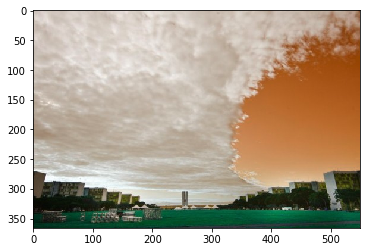

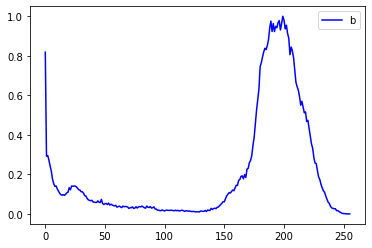

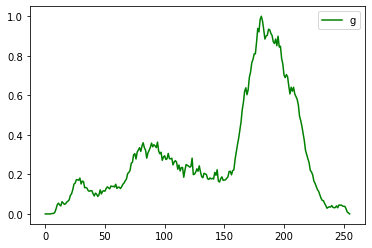

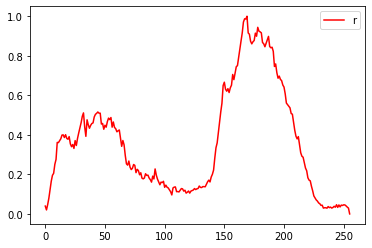

In [10]:
# Read image
img_sky = cv2.imread('sky.jpg')
plt.imshow(img_sky)
hist_sky = get_histogram(img_sky)

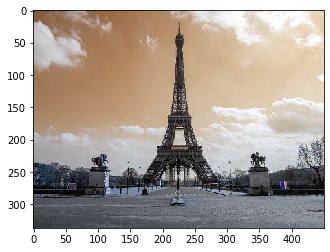

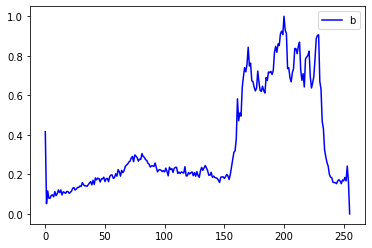

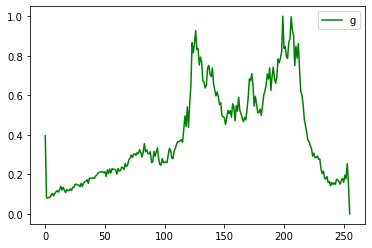

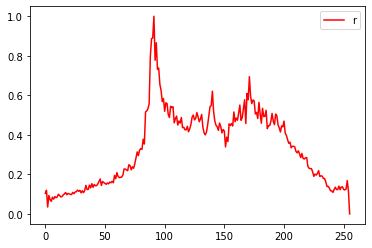

In [11]:
# Read image
img_paris = cv2.imread('paris.jpg')
plt.imshow(img_paris)
hist_paris = get_histogram(img_paris)

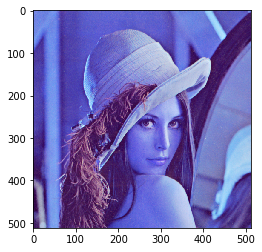

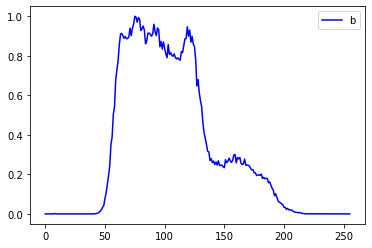

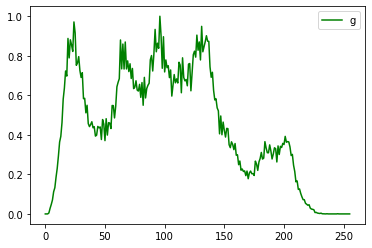

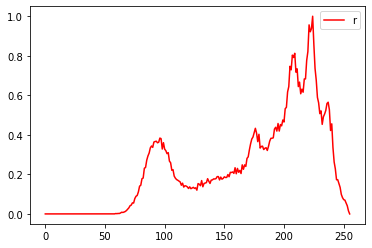

In [12]:
# Read image
# cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_lenna = cv2.imread('lenna.png')
plt.imshow(img_lenna)

# cv2.imshow("Lenna", img_lenna)
# #waits for user to press any key  
# #(this is necessary to avoid Python kernel form crashing) 
# cv2.waitKey(0)  
# #closing all open windows  
# cv2.destroyAllWindows()  

hist_lenna = get_histogram(img_lenna)

In [13]:
# Distance between lenna and sky
print('Distance between lenna and sky')
eucl_dist(img_lenna, img_sky)

# Distance between lenna and paris
print('Distance between lenna and paris')
eucl_dist(img_lenna, img_paris)

# Distance between paris and sky
print('Distance between paris and sky')
eucl_dist(img_paris, img_sky)

print('The end! (of the first class)')

Distance between lenna and sky
Euclidian Distance between images: 7.244718
Distance between lenna and paris
Euclidian Distance between images: 6.050371
Distance between paris and sky
Euclidian Distance between images: 3.915896
The end! (of the first class)
